=== 欧氏距离矩阵 ===
name     A     B     C     D     E     F     G     H
name                                                
A     0.00  5.00  8.49  3.61  7.07  7.21  8.06  2.24
B     5.00  0.00  6.08  4.24  5.00  4.12  3.16  4.47
C     8.49  6.08  0.00  5.00  1.41  2.00  7.28  6.40
D     3.61  4.24  5.00  0.00  3.61  4.12  7.21  1.41
E     7.07  5.00  1.41  3.61  0.00  1.41  6.71  5.00
F     7.21  4.12  2.00  4.12  1.41  0.00  5.39  5.39
G     8.06  3.16  7.28  7.21  6.71  5.39  0.00  7.62
H     2.24  4.47  6.40  1.41  5.00  5.39  7.62  0.00

=== 聚类结果 ===
  name  x   y  cluster
0    A  2  10        0
1    B  2   5        1
2    C  8   4        2
3    D  5   8        0
4    E  7   5        2
5    F  6   4        2
6    G  1   2        1
7    H  4   9        0


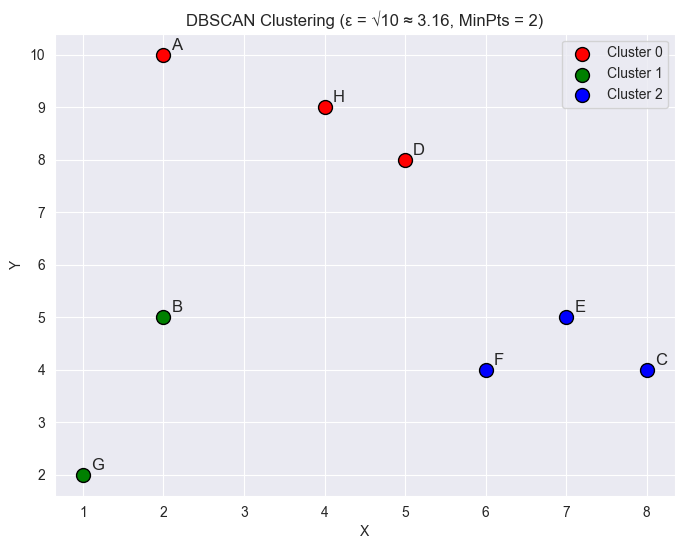

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist

# 原始数据点
data = {
    'name': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    'x':    [2,    2,   8,   5,   7,   6,   1,   4],
    'y':    [10,   5,   4,   8,   5,   4,   2,   9]
}
df = pd.DataFrame(data)

# 提取坐标
X = df[['x', 'y']].values

# 计算距离矩阵（欧氏距离）
distance_matrix = pd.DataFrame(
    cdist(X, X, metric='euclidean'),
    columns=df['name'],
    index=df['name']
)

# 显示距离矩阵
print("=== 欧氏距离矩阵 ===")
print(np.round(distance_matrix, 2))

# DBSCAN 聚类
eps = np.sqrt(10)      # 约等于 3.16
min_samples = 2
db = DBSCAN(eps=eps, min_samples=min_samples)
df['cluster'] = db.fit_predict(X)

# 输出聚类结果
print("\n=== 聚类结果 ===")
print(df[['name', 'x', 'y', 'cluster']])

# 可视化
colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.figure(figsize=(8, 6))
for cluster_id in sorted(df['cluster'].unique()):
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(subset['x'], subset['y'],
                label=f'Cluster {cluster_id}' if cluster_id != -1 else 'Noise',
                c=colors[cluster_id % len(colors)] if cluster_id != -1 else 'gray',
                s=100, edgecolors='black')
    for i, row in subset.iterrows():
        plt.text(row['x'] + 0.1, row['y'] + 0.1, row['name'], fontsize=12)

plt.title(f'DBSCAN Clustering (ε = √10 ≈ {eps:.2f}, MinPts = {min_samples})')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.show()
